# ReFax App

We are going to reuse the model we trained in the previous notebook to predict the emotion of a given image.

In [24]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# video capture source camera (Here webcam of laptop)
frameWidth = 640
frameHeight = 480
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, 150)

while cap.isOpened():
    success, img = cap.read()
    if success:
        cv2.imshow("Result", img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.imwrite('images/webcamimg.png', img)
            cv2.destroyAllWindows()
            break

cap.release()

[ WARN:0@1078.169] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


In [17]:
class_names = ['Neutral', 'Happy', 'Sad', 'Surprise',
               'Fear', 'Disgust', 'Anger', 'Contempt']


In [29]:
# The default path to the saved TensorFlow Lite model
TF_MODEL_FILE_PATH = 'model.tflite'

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)


In [30]:
interpreter.get_signature_list()


{'serving_default': {'inputs': ['sequential_2_input'], 'outputs': ['outputs']}}

In [31]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite


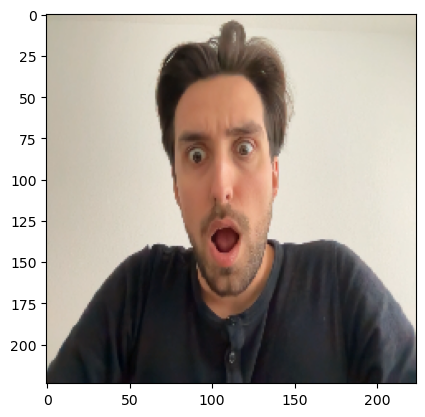

In [32]:
img = tf.keras.utils.load_img(
    'images/webcamimg.png', target_size=(224, 224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch


plt.imshow(img_array[0].numpy().astype("uint8"))


In [33]:
predictions_lite = classify_lite(sequential_2_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)


In [34]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

print(predictions_lite)


This image most likely belongs to Fear with a 40.17 percent confidence.
[[-1.9543054  -2.3745394   0.5302918   3.2097495   3.228974   -0.56628
   2.2913942  -0.79170007]]
